In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [8]:
list_cities = os.listdir("data/Cities")
print(list_cities)

['beijing.csv', 'chicago.csv', 'dubai.csv', 'las-vegas.csv', 'london.csv', 'montreal.csv', 'new-delhi.csv', 'new-york-city.csv', 'san-francisco.csv', 'shanghai.csv']


In [31]:
list_df = []
for i in range (0,len(list_cities)):
    name = list_cities[i]
    df_name = "df_" + name
    locals()[df_name] = pd.read_csv("data/Cities/" + name)
    list_df.append(locals()[df_name])

In [32]:
processed_df = []

for i in range (0, len(list_df)):
    
    df = list_df[i]
    #Drop the date column
    df = df.drop(columns = "Date")
    df = df.dropna(subset = ["Title", "Review"])
    df = df.fillna(" ")
    #Merge Title and review columns
    df["Complete_review"] = df["Title"] + " " + df["Review"]
    df = df.drop(columns = ["Title", "Review"])
    processed_df.append(df)


,Complete_review
0,Slum Not only are the rooms jacked up but the ...
1,A Good Place for People Who Like Bad Places. I...
2,Horrible Experience I have stayed in a decent ...
3,Worst Hotel I have ever seen! I travel the nat...
4,What a NIGHTMARE--oblivious to the meaning of ...
...,...
18214,Love those W beds What a great hotel!! The bed...
18215,Fun A much needed &quot;Girls Weekend&quot;....
18216,Nice Place The W Lakeshore is a wonderful hote...
18217,W Hotel Lakeshore Terrible checked into the W ...


In [46]:
final_data = pd.concat(processed_df, axis = 0)

,Complete_review
0,Nice trendy hotel location not too bad. I stay...
1,Great Budget Hotel! Stayed two nights at Aloft...
2,Excellent value - location not a big problem. ...
3,Stylish clean reasonable value poor location I...
4,Remote but excellent value for money Stayed th...
...,...
4258,Good value - great location over the metro We ...
4259,Not the best - needs work on staff and managem...
4260,A little on the seedy side The Zhao An was the...
4261,A slightly-above-average 3* hotel with definit...


Max length: 3846, Min length: 2, Average Length :  188.01820897738838


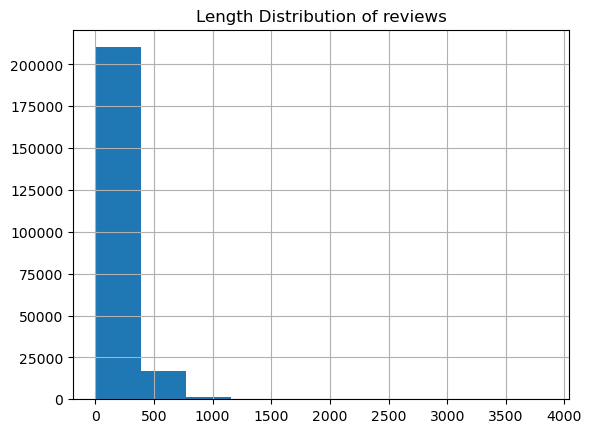

In [47]:
final_data['len']= final_data['Complete_review'].str.split().map(lambda x: len(x))
print('Max length: {}, Min length: {}, Average Length :  {}'.format(max(final_data['len']),min(final_data['len']),final_data['len'].mean()))
final_data['len'].hist()
plt.title('Length Distribution of reviews')
plt.show()

In [49]:
import re

df = final_data

text= ' '.join(t for t in df['Complete_review'])

text = re.sub('\n', '', text)
text = re.sub('\?', '', text)
text = re.sub('"', '', text)
text = re.sub("'", '', text)

words_list= text.split()
word_freq= dict()

for word in set(words_list):
  word_freq[word] = 0

for word in words_list:
  word_freq[word] += 1  

df_word= pd.DataFrame(word_freq.items(),columns=['word','count'])
df_word['word_len']= df_word['word'].map(lambda x: len(x))
df_word=df_word.sort_values('count',ascending=False).reset_index(drop=True)
df_word.head()

,word,count,word_len
0,the,2258621,3
1,and,1437560,3
2,a,1215765,1
3,to,1062679,2
4,was,892653,3


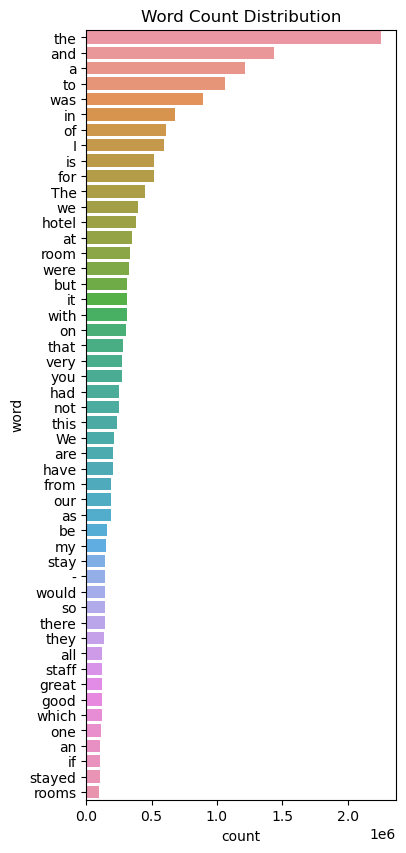

In [53]:
df_top= df_word.head(50)
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(10)
sns.barplot(x=df_top['count'], y=df_top['word'])
plt.title('Word Count Distribution')
plt.show()

In [58]:
!pip install wordcloud

     ------------------------------------ 153.3/153.3 kB 653.2 kB/s eta 0:00:00


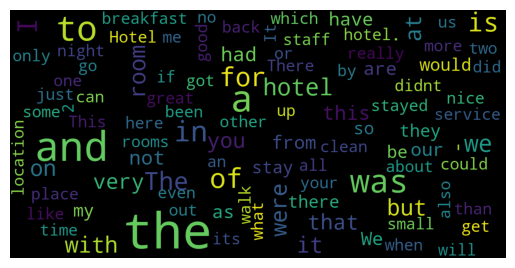

In [60]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='black',max_words=100 ,max_font_size=40 ,scale=3,random_state=1).generate_from_frequencies(word_freq)
plt.axis("off")
plt.imshow(wordcloud)